## Portfolio Exercise Starbucks
<br>

<img src="https://opj.ca/wp-content/uploads/2018/02/New-Starbucks-Logo-1200x969.jpg" width="200" height="200">
<br>
<br>
 
#### Background Information

The dataset you will be provided in this portfolio exercise was originally used as a take-home assignment provided by Starbucks for their candidates.   The data for this exercise consists of about 120,000 data points split in 2:1 ratio among training and test files. Each data point includes one column indicating whether or not an individual was sent a promotion for a specific product, and one column indicating whether or not that individual eventually purchased that product. Each individual also had seven additional features associated with them.

#### Optimization Strategy

Your task is to use the training data to understand what patterns in V1-V7 to indicate that a promotion should be provided to a user.  Specifically, your goal is to maximize the following metrics:

* **Incremental Response Rate (IRR)** 

Ratio of the number of purchasers in the promotion group to the total number of customers in the purchasers group minus the ratio of the number of purchasers in the non-promotional group to the total number of customers in the non-promotional group.

* **Net Incremental Revenue (NIR)**

The total number of purchasers that received the promotion times 10 minus the number of promotions given times 0.15 minus the number of purchasers who were not given the promotion times 10.

For a full description of what starbucks provides to candidates see the [instructions available here](https://drive.google.com/open?id=18klca9Sef1Rs6q8DW4l7o349r8B70qXM).

Below you can find the training data provided.  Explore the data and different optimization strategies.

#### How To Test Your Strategy?

When you feel like you have an optimization strategy, complete the **promotion_strategy** function to pass to the **test_results** function.  
From past data, we know there are four possible outomes:

Table of actual promotion vs. predicted promotion customers.  

|   | Actual      |    |    | 
|---|-------------|----|----|
| **Predicted**   | Yes| No |  
| Yes             | **I**   | **II**|  
| No              | **III** | **IV**|  

The metrics are only being compared for the individual's we predict should obtain the promotion - that is quadrants I and II here.  Since the first set of individuals that receive the promotion (in the training set) receive it randomly, we can expect that quadrants I and II will have approximately equal participants.  

Comparing quadrant I to II then gives an idea of how well your promotion strategy will work in the future. 


Get started by reading in the data below.  See how each variable or combination of variables along with a promotion influences the chance of purchasing.  When you feel like you have a strategy for who should receive a promotion, test your strategy against the test dataset used in the final test_results function.

In [1]:
# load in packages
from itertools import combinations

from test_results import test_results, score
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# load in the data
train_data = pd.read_csv('./data/training.csv')
train_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,1,No,0,2,30.443518,-1.165083,1,1,3,2
1,3,No,0,3,32.159350,-0.645617,2,3,2,2
2,4,No,0,2,30.431659,0.133583,1,1,4,2
3,5,No,0,0,26.588914,-0.212728,2,1,4,2
4,8,Yes,0,3,28.044332,-0.385883,1,1,2,2


In [2]:
# Cells for you to work and document as necessary - 
# definitely feel free to add more cells as you need
train_data.isnull().mean()

ID           0.0
Promotion    0.0
purchase     0.0
V1           0.0
V2           0.0
V3           0.0
V4           0.0
V5           0.0
V6           0.0
V7           0.0
dtype: float64

In [3]:
test_data = pd.read_csv('./data/Test.csv')
test_data.head()

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,2,No,0,1,41.376390,1.172517,1,1,2,2
1,6,Yes,0,1,25.163598,0.653050,2,2,2,2
2,7,Yes,0,1,26.553778,-1.597972,2,3,4,2
3,10,No,0,2,28.529691,-1.078506,2,3,2,2
4,12,No,0,2,32.378538,0.479895,2,2,1,2


In [5]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7']


In [6]:
train_data['Promotion'].value_counts()

Yes    42364
No     42170
Name: Promotion, dtype: int64

In [7]:
train_data['purchase'].value_counts()


0    83494
1     1040
Name: purchase, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C484FEB688>,
      dtype=object)

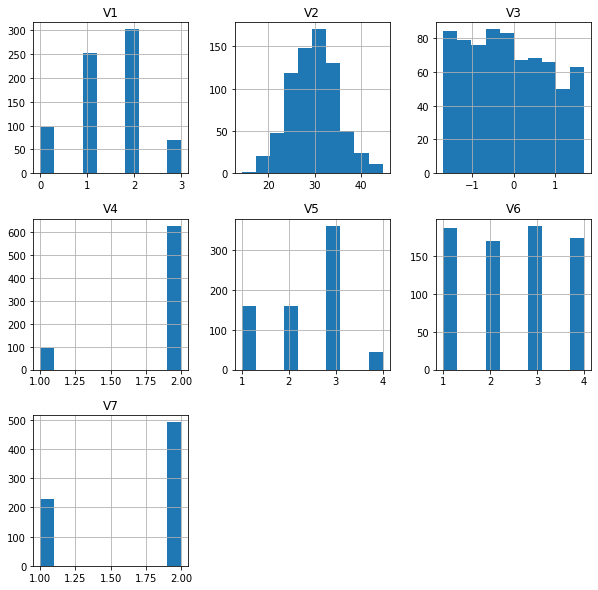

In [8]:
train_data[(train_data['Promotion']=='Yes') & (train_data['purchase']==1)][features].hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C48523CD88>,
      dtype=object)

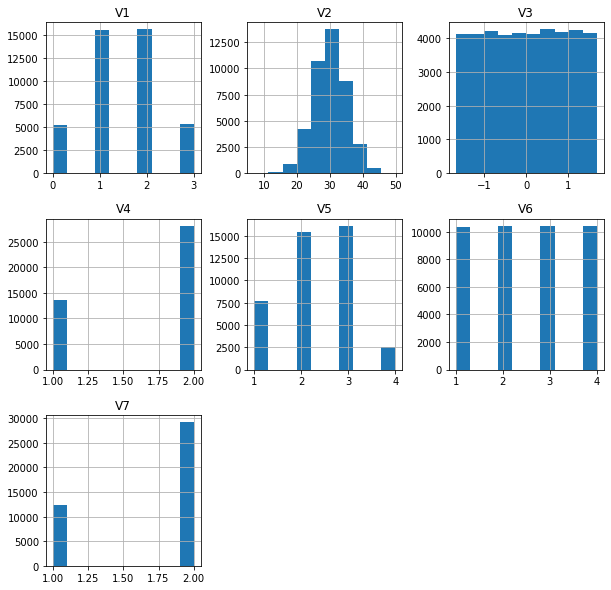

In [9]:
train_data[(train_data['Promotion']=='Yes') & (train_data['purchase']==0)][features].hist(figsize=(10,10))

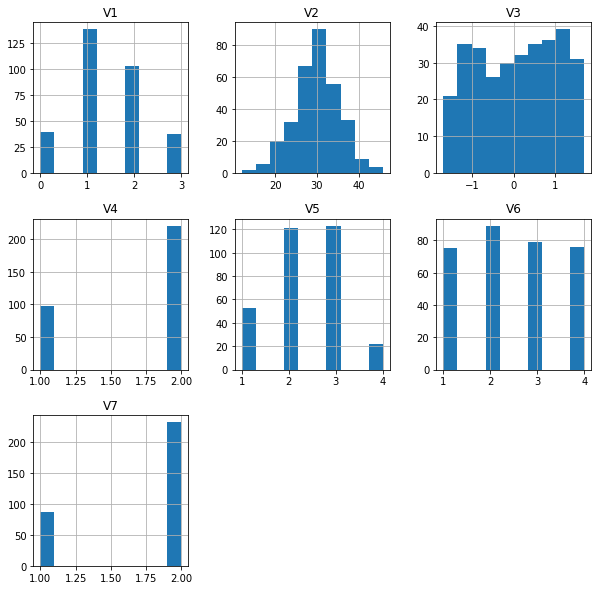

In [10]:
train_data[(train_data['Promotion']=='No') & (train_data['purchase']==1)][features].hist(figsize=(10,10));


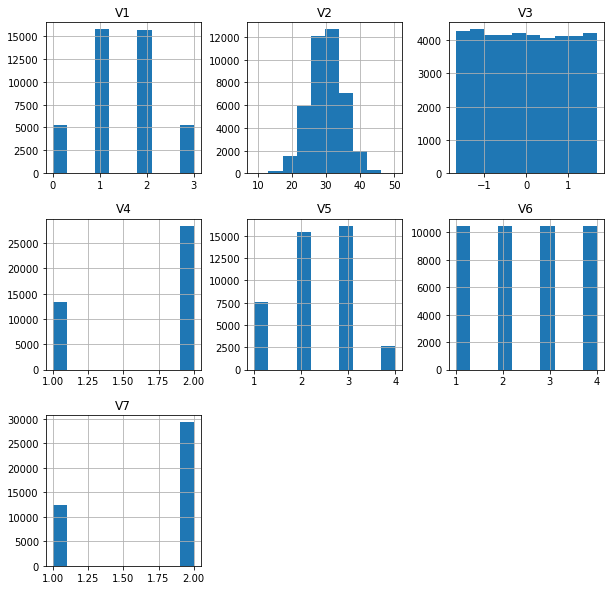

In [11]:
train_data[(train_data['Promotion']=='No') & (train_data['purchase']==0)][features].hist(figsize=(10,10));


In [12]:
def promotion_strategy(df):
    '''
    INPUT 
    df - a dataframe with *only* the columns V1 - V7 (same as train_data)

    OUTPUT
    promotion_df - np.array with the values
                   'Yes' or 'No' related to whether or not an 
                   individual should recieve a promotion 
                   should be the length of df.shape[0]
                
    Ex:
    INPUT: df
    
    V1	V2	  V3	V4	V5	V6	V7
    2	30	-1.1	1	1	3	2
    3	32	-0.6	2	3	2	2
    2	30	0.13	1	1	4	2
    
    OUTPUT: promotion
    
    array(['Yes', 'Yes', 'No'])
    indicating the first two users would recieve the promotion and 
    the last should not.
    '''
    test = df
    
    promotion = []
    
    num_test_points = test.shape[0]
    
    for i in range(num_test_points):
        promotion.append('Yes')
        
    promotion = np.array(promotion)
       
    return promotion

In [14]:
# This will test your results, and provide you back some information 
# on your how well your promotion_strategy will work in practice

test_results(promotion_strategy)

Nice job!  See how well your strategy worked on our test data below!

Your irr with this strategy is 0.01.

Your nir with this strategy is -1132.20.
Approximately, the highest scores obtained at Udacity were: irr of 0.1 and an nir of 300.

 How did you do?


(0.009593158278250108, -1132.1999999999998)

In [15]:
# sample size needed for control and treatment group
NormalIndPower().solve_power(effect_size = proportion_effectsize(.0096, .015), alpha=.05, power=0.8, alternative='smaller')

5089.265513625437

In [17]:
### two models approach

train_data = pd.read_csv('./training.csv')
test_data = pd.read_csv('./Test.csv')

In [18]:
# split
train, valid = sk.model_selection.train_test_split(train_data, test_size=0.2, random_state=42)

In [19]:
valid_control = valid[valid['Promotion'] == 'No']
Y_valid_control = valid_control['purchase']
X_valid_control = valid_control[features]

valid_exper = valid[valid['Promotion'] == 'Yes']
Y_valid_exper = valid_exper['purchase']
X_valid_exper = valid_exper[features]

In [22]:
# generate training data
train_control = train[train['Promotion']=='No']
Y_train_control = train_control['purchase']
X_train_control = train_control[features]

train_exper = train[train['Promotion']=='Yes']
Y_train_exper = train_exper['purchase']
X_train_exper = train_exper[features]

In [23]:
sm = SMOTE(random_state=42, sampling_strategy = 1.0)

# up-sample control group
X_train_control_upsamp, Y_train_control_upsamp = sm.fit_sample(X_train_control, Y_train_control)
X_train_control_upsamp = pd.DataFrame(X_train_control_upsamp, columns = features)
Y_train_control_upsamp = pd.Series(Y_train_control_upsamp)

# up sample treatment group
X_train_exper_upsamp, Y_train_exper_upsamp = sm.fit_sample(X_train_exper, Y_train_exper)    
X_train_exper_upsamp = pd.DataFrame(X_train_exper_upsamp, columns=features)
Y_train_exper_upsamp = pd.Series(Y_train_exper_upsamp)

In [25]:
# train control model
eval_set = [(X_train_control_upsamp, Y_train_control_upsamp), (X_valid_control, Y_valid_control)]

model_control = xgb.XGBClassifier(learning_rate = 0.1,
                                  max_depth=7,
                                  min_child_weight = 5,
                                  objective = 'binary:logistic',
                                  seed = 42,
                                  gamma = 1,
                                  silent = False
                                 )

model_control.fit(X_train_control_upsamp, Y_train_control_upsamp, eval_set=eval_set, eval_metric='auc', verbose=True, early_stopping_rounds=30)

[0]	validation_0-auc:0.749518	validation_1-auc:0.474177
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.772788	validation_1-auc:0.47491
[2]	validation_0-auc:0.777905	validation_1-auc:0.46787
[3]	validation_0-auc:0.790457	validation_1-auc:0.463392
[4]	validation_0-auc:0.795973	validation_1-auc:0.472601
[5]	validation_0-auc:0.814322	validation_1-auc:0.478545
[6]	validation_0-auc:0.824512	validation_1-auc:0.481793
[7]	validation_0-auc:0.85821	validation_1-auc:0.498108
[8]	validation_0-auc:0.863331	validation_1-auc:0.504362
[9]	validation_0-auc:0.862966	validation_1-auc:0.505136
[10]	validation_0-auc:0.874074	validation_1-auc:0.508588
[11]	validation_0-auc:0.883838	validation_1-auc:0.50589
[12]	validation_0-auc:0.88992	validation_1-auc:0.51082
[13]	validation_0-auc:0.896374	validation_1-auc:0.511797
[14]	validation_0-auc:0.899705	validation_1-auc:0.51365
[15]	

XGBClassifier(gamma=1, max_depth=7, min_child_weight=5, seed=42, silent=False)

In [26]:
# train treatment model
eval_set = [(X_train_exper_upsamp, Y_train_exper_upsamp), (X_valid_exper, Y_valid_exper)]
model_exper = xgb.XGBClassifier(learning_rate = 0.1,\
                                max_depth = 7,\
                                min_child_weight = 5,\
                                objective = 'binary:logistic',\
                                seed = 42,\
                                gamma = 1,\
                                #colsample_bytree = 0.1,\
                                silent = True)
model_exper.fit(X_train_exper_upsamp, Y_train_exper_upsamp, eval_set=eval_set,\
                eval_metric="auc", verbose=True, early_stopping_rounds=30)

[0]	validation_0-auc:0.747982	validation_1-auc:0.576929
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.772184	validation_1-auc:0.580918
[2]	validation_0-auc:0.775085	validation_1-auc:0.578746
[3]	validation_0-auc:0.779998	validation_1-auc:0.577736
[4]	validation_0-auc:0.799217	validation_1-auc:0.582992
[5]	validation_0-auc:0.823259	validation_1-auc:0.58413
[6]	validation_0-auc:0.822712	validation_1-auc:0.583672
[7]	validation_0-auc:0.823361	validation_1-auc:0.58206
[8]	validation_0-auc:0.830297	validation_1-auc:0.583048
[9]	validation_0-auc:0.840554	validation_1-auc:0.581258
[10]	validation_0-auc:0.845075	validation_1-auc:0.582304
[11]	validation_0-auc:0.852002	validation_1-auc:0.582233
[12]	validation_0-auc:0.862123	validation_1-auc:0.582368
[13]	validation_0-auc:0.863555	validation_1-auc:0.588419
[14]	validation_0-auc:0.868757	validation_1-auc:0.588766


XGBClassifier(gamma=1, max_depth=7, min_child_weight=5, seed=42, silent=True)

In [27]:
# make predictions
control_valid_pred = model_control.predict(X_valid_control, ntree_limit=model_control.best_ntree_limit)
exper_valid_pred = model_exper.predict(X_valid_exper, ntree_limit=model_exper.best_ntree_limit)

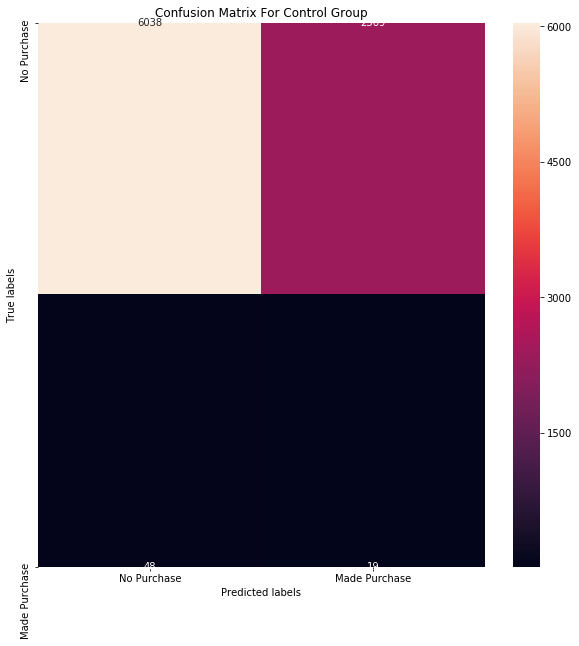

In [29]:
# confusion marix for thge validation set
#valid_pred = model.predict(X_valid, ntree_limit=model.best_ntree_limit)
cm = sk.metrics.confusion_matrix(Y_valid_control, control_valid_pred)

fig, ax= plt.subplots(figsize=(10,10))
sb.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix For Control Group'); 
ax.xaxis.set_ticklabels(['No Purchase', 'Made Purchase']); 
ax.yaxis.set_ticklabels(['No Purchase', 'Made Purchase']);

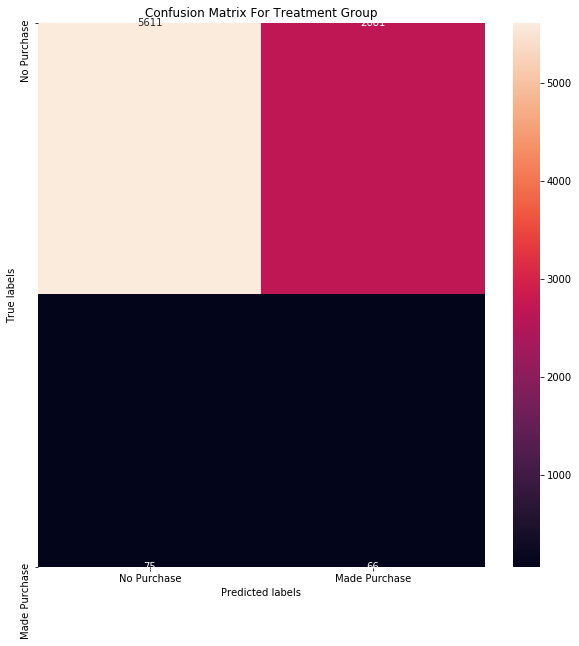

In [30]:

# confusion marix for thge validation set
#valid_pred = model.predict(X_valid, ntree_limit=model.best_ntree_limit)
cm = sk.metrics.confusion_matrix(Y_valid_exper, exper_valid_pred)

fig, ax= plt.subplots(figsize=(10,10))
sb.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix For Treatment Group'); 
ax.xaxis.set_ticklabels(['No Purchase', 'Made Purchase']); 
ax.yaxis.set_ticklabels(['No Purchase', 'Made Purchase']);

In [31]:
def promotion_strategy(df):
    '''
    INPUT 
    df - a dataframe with *only* the columns V1 - V7 (same as train_data)

    OUTPUT
    promotion_df - np.array with the values
                   'Yes' or 'No' related to whether or not an 
                   individual should recieve a promotion 
                   should be the length of df.shape[0]            
    Ex:
    INPUT: df
    
    V1	V2	  V3	V4	V5	V6	V7
    2	30	-1.1	1	1	3	2
    3	32	-0.6	2	3	2	2
    2	30	0.13	1	1	4	2
    
    OUTPUT: promotion
    
    array(['Yes', 'Yes', 'No'])
    indicating the first two users would recieve the promotion and 
    the last should not.
    '''
    
    test = df
    
    pred_probs_control = model_control.predict_proba(test, ntree_limit=model_control.best_ntree_limit)
    pred_probs_exper = model_exper.predict_proba(test, ntree_limit=model_exper.best_ntree_limit)
    
    lift = pred_probs_exper[:, 1] - pred_probs_control[:, 1]
    
    promotion = []
    
    cutoff_lift = np.percentile(lift, 97)
    
    for prob in lift:
        if prob > 0:
            if prob > cutoff_lift:
                promotion.append('Yes')
        else:
            promotion.append('No')
            
    promotion = np.array(promotion)
    
    return promotion

In [33]:
# This will test your results, and provide you back some information 
# on how well your promotion_strategy will work in practice

test_results(promotion_strategy)

Nice job!  See how well your strategy worked on our test data below!

Your irr with this strategy is -0.00.

Your nir with this strategy is -103.15.
Approximately, the highest scores obtained at Udacity were: irr of 0.1 and an nir of 300.

 How did you do?


(-0.0015026103367283099, -103.14999999999999)